# Fourier Transform of rect() and Shifted rect()

In [1]:
import numpy as np
from numpy import logspace, linspace
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, savefig
try: 
    import scipy.integrate
except:
    %pip install scipy
import scipy.integrate
from scipy import signal

plt.rcParams['figure.figsize'] = [8, 5.0]
plt.rcParams['figure.dpi'] = 150
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.grid'] = True

SMALL_SIZE = 14
MEDIUM_SIZE = 24
BIGGER_SIZE = 32

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def nicegrid(ax=plt):
    ax.grid(True, which='major', color='#666666', linestyle=':')
    ax.grid(True, which='minor', color='#999999', linestyle=':', alpha=0.2)
    ax.minorticks_on()
    
%matplotlib inline

try: 
    from sympy import lambdify, oo, Symbol, integrate, Heaviside, plot, Piecewise
except:
    %pip install sympy
from sympy import lambdify, oo, Symbol, integrate, Heaviside, plot, Piecewise
from sympy import fourier_transform, exp, inverse_fourier_transform, sympify, DiracDelta, sinc, sin, cos, arg, atan2
from sympy.abc import A,B,t,f 
from sympy import re, im 

tlim = 3
tt = np.linspace(-tlim, tlim, 1000)
flim = 3
ff = np.linspace(-flim, flim, 1000)
ts = Symbol('t')

## Define 2 ftns of interest

In [2]:
def my_rect(A,B):
    return Piecewise((0, t <= A),(1, t < B),(0, True))

# rect
F1 = my_rect(-1/2,1/2)
lam_F1 = lambdify(ts, F1, modules=['numpy'])

# shifted rect
F2 = my_rect(0,1)
lam_F2 = lambdify(ts, F2, modules=['numpy'])

## Plot ftns

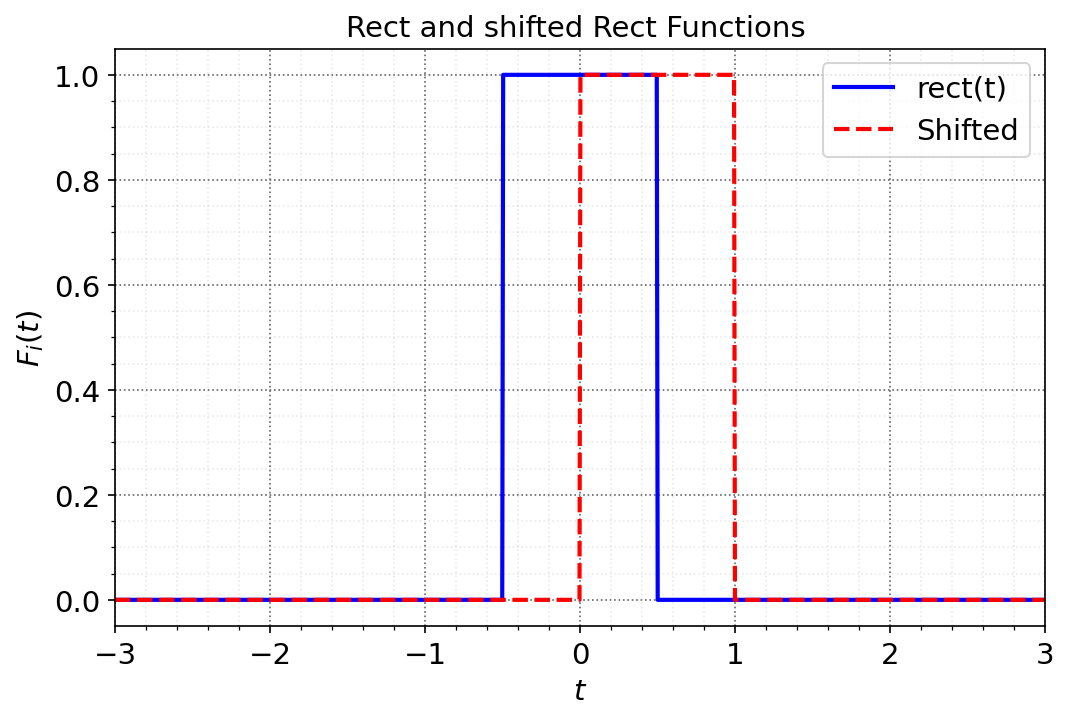

In [3]:
fig = plt.figure()
plt.plot(tt, lam_F1(tt),'b',label='rect(t)')
plt.plot(tt, lam_F2(tt),'r--',label='Shifted')

nicegrid()
plt.legend()
plt.xlim(-tlim,tlim)
plt.xlabel('$t$')
plt.ylabel('$F_i(t)$')
plt.title('Rect and shifted Rect Functions ')
plt.show()

## Transform and plot Real/Imag Parts

In [4]:
Q1 = fourier_transform(F1, t, f)
lam_Q1i = lambdify(f, im(Q1), modules=['numpy'])
lam_Q1r = lambdify(f, re(Q1), modules=['numpy'])

Q2 = fourier_transform(F2, t, f)
lam_Q2i = lambdify(f, im(Q2), modules=['numpy'])
lam_Q2r = lambdify(f, re(Q2), modules=['numpy'])

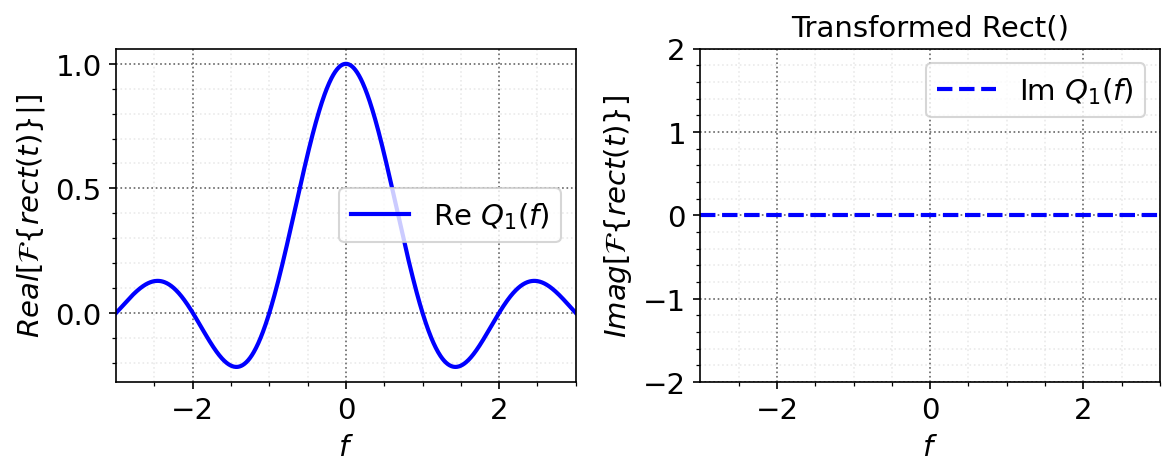

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3), dpi=150)
fig.tight_layout()
ax1.plot(ff, lam_Q1r(ff),'b',label='Re $Q_1(f)$')
ax1.set_ylabel('$Real[{\cal F}\{ rect(t)\}|]$')
ax1.set_xlabel('$f$')
ax1.set_xlim(-flim,flim)
ax1.legend()
nicegrid(ax1)

ax2.plot(ff, lam_Q1i(ff),'b--',label='Im $Q_1(f)$')
ax2.set_title('Phase')
ax2.set_ylabel('$Imag[{\cal F}\{ rect(t)\}]$')
ax2.set_xlabel('$f$')
ax2.set_xlim(-flim,flim)
ax2.set_ylim(-2,2)
nicegrid(ax2)
plt.legend()

plt.title('Transformed Rect()')
nicegrid()
plt.show()

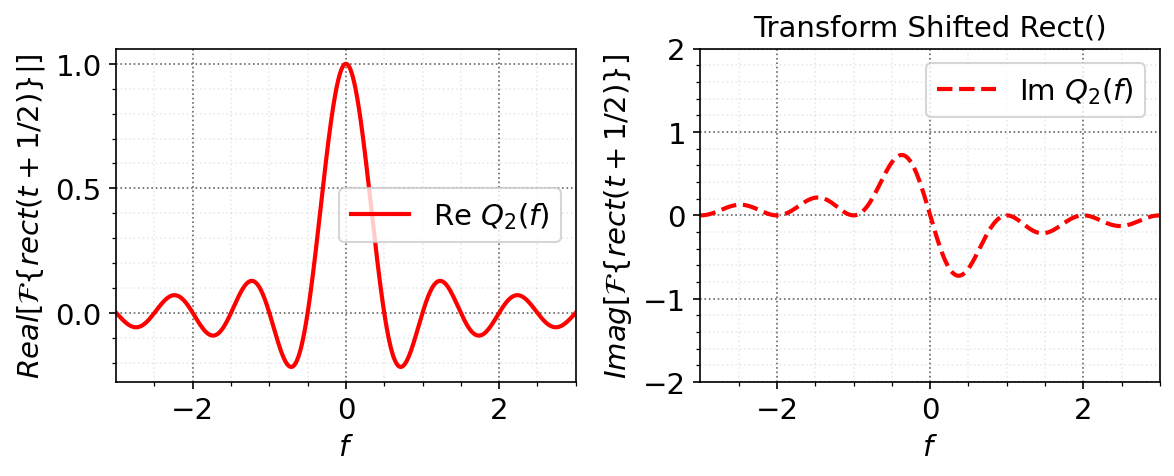

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3), dpi=150)
fig.tight_layout()
ax1.plot(ff, lam_Q2r(ff),'r',label='Re $Q_2(f)$')
ax1.set_ylabel('$Real[{\cal F}\{ rect(t+1/2)\}|]$')
ax1.set_xlabel('$f$')
ax1.set_xlim(-flim,flim)
ax1.legend()
nicegrid(ax1)

ax2.plot(ff, lam_Q2i(ff),'r--',label='Im $Q_2(f)$')
ax2.set_title('Phase')
ax2.set_ylabel('$Imag[{\cal F}\{ rect(t+1/2)\}]$')
ax2.set_xlabel('$f$')
ax2.set_xlim(-flim,flim)
ax2.set_ylim(-2,2)
nicegrid(ax2)
plt.legend()
plt.title('Transform Shifted Rect()')
plt.show()